<a href="https://colab.research.google.com/github/nchebet09/Restaurant-Recommender-System/blob/master/Akeed_5_Bivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required libraries and loading the data






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime as dt
import plotly.express as px



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_color_codes(palette='pastel')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore') 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/after_univariate_clean.csv')

In [ ]:
df.head()

,akeed_customer_id,gender,customer_acc_verified,location_number,latitude_customer,longitude_customer,id,authentication_id,latitude_vendor,longitude_vendor,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,preparation_time,discount_percentage,vendor_acc_verified,rank,vendor_rating,city_id,device_type,CID X LOC_NUM X VENDOR,target,vendor_duration_open,haversine_dist,c_diff,u_diff
0,TCHWPBT,0,1,0,-96.44,-67.2,4,118597.0,-0.5884,0.7544,Restaurants,2.0,0.0,6.0,1.0,15.0,0.0,1.0,11.0,4.4,1.0,3.0,TCHWPBT X 0 X 4,0.0,12.0,10210.781498,-9 days +19:25:41,789 days 19:56:20
1,TCHWPBT,0,1,0,-96.44,-67.2,13,118608.0,-0.4717,0.7446,Restaurants,2.0,0.7,5.0,1.0,14.0,0.0,1.0,11.0,4.7,1.0,3.0,TCHWPBT X 0 X 13,0.0,14.0,10223.800918,84 days 17:15:43,788 days 01:29:40
2,TCHWPBT,0,1,0,-96.44,-67.2,20,118616.0,-0.4075,0.6436,Restaurants,2.0,0.0,8.0,1.0,19.0,0.0,1.0,1.0,4.5,1.0,3.0,TCHWPBT X 0 X 20,0.0,14.0,10232.068678,86 days 03:11:59,789 days 21:19:32
3,TCHWPBT,0,1,0,-96.44,-67.2,23,118619.0,-0.5854,0.7540,Restaurants,2.0,0.0,5.0,1.0,16.0,0.0,1.0,11.0,4.5,1.0,3.0,TCHWPBT X 0 X 23,0.0,12.0,10211.117900,88 days 00:04:25,784 days 05:39:54
4,TCHWPBT,0,1,0,-96.44,-67.2,28,118624.0,0.4807,0.5527,Restaurants,2.0,0.7,15.0,1.0,10.0,0.0,1.0,11.0,4.4,1.0,3.0,TCHWPBT X 0 X 28,0.0,12.0,10331.347778,99 days 02:56:15,787 days 20:41:18


In [ ]:
df.shape

(129746, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129746 entries, 0 to 129745
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   akeed_customer_id       129746 non-null  object 
 1   gender                  129746 non-null  int64  
 2   customer_acc_verified   129746 non-null  int64  
 3   location_number         129746 non-null  int64  
 4   latitude_customer       129746 non-null  float64
 5   longitude_customer      129746 non-null  float64
 6   id                      129746 non-null  int64  
 7   authentication_id       129746 non-null  float64
 8   latitude_vendor         129746 non-null  float64
 9   longitude_vendor        129746 non-null  float64
 10  vendor_category_en      129746 non-null  object 
 11  vendor_category_id      129746 non-null  float64
 12  delivery_charge         129746 non-null  float64
 13  serving_distance        129746 non-null  float64
 14  is_open             

In [ ]:
#Checking the nature and particulars of our columns 
for column in df.columns:
  print(column)
  print(df[column].nunique())
  print(df[column].unique())
  print("----------------------------------------------------------------")

akeed_customer_id
481
['TCHWPBT' 'ZGFSYCZ' 'S2ALZFL' '952DBJQ' '1IX6FXS' 'IL9MJSW' 'EZTXK46'
 'A79YCES' 'Y39V6UD' 'XRPTQNV' '8OSXJI8' 'FYTKIIM' 'FJ8AF4X' 'E1L5EUE'
 '9VJZUWB' 'VTHMCR3' 'THHIBW2' 'ICN6274' 'O49LK57' 'EIA3K80' 'B2JXGRT'
 'XG4SHUG' 'U3SMK7L' 'QRM5VZ4' '6IP4MC6' '8C49O40' 'H3XVQII' 'S7Y6MPR'
 '4LBD81K' 'X282CGD' '8D68B9A' 'L7LCJ6I' 'YH9F4ZX' 'Q4ENL8Z' 'PMTKV28'
 '9FS28PB' '7K4HQC6' 'BS5WCTE' 'VQIP8S1' '68XS3L6' 'AW7YVW3' 'ZDP0JV6'
 '69HI4N8' '64WEP9L' 'EE6DB8A' 'BSYAJH7' 'Q0AC0E1' 'N8LDBN0' 'RK729MG'
 'X2DX17F' 'NDYLK9A' 'NL77W34' 'JA8NVJ2' 'BSJPPS7' '3ISHF8M' 'Q3IYJX0'
 '09Z9QF9' 'BROQAX6' 'E9QLAHC' 'XCPFGA9' 'VGAYR39' 'ZW3GSK3' 'SMSZ1HJ'
 'EI5BHI8' 'J3W8CE1' 'JXNJKYC' 'QZNR6PF' 'HDEPQ9O' 'NDODUQW' 'H6O4R86'
 'C2VNC3Z' 'IKMK980' 'N20NE9Z' 'HH8JUK3' '6YT13BS' '436H5RZ' '7NGMW1A'
 '309N6DD' 'COMQ74L' 'KF9OBAC' 'OM4LWMM' '6QHK8GD' 'P9L79BG' 'RCBQXNX'
 'P8FBGL6' 'NZWUHNA' 'CIVPXLC' 'X02L5G7' 'GH8JZZC' 'CL2MLEH' 'BBJ3LU6'
 'VNFCJZS' '7K92VJR' '6MIH95A' 'LZV17OZ' 'ZMD2BCF' 'KMX

## Bivariate analysis 

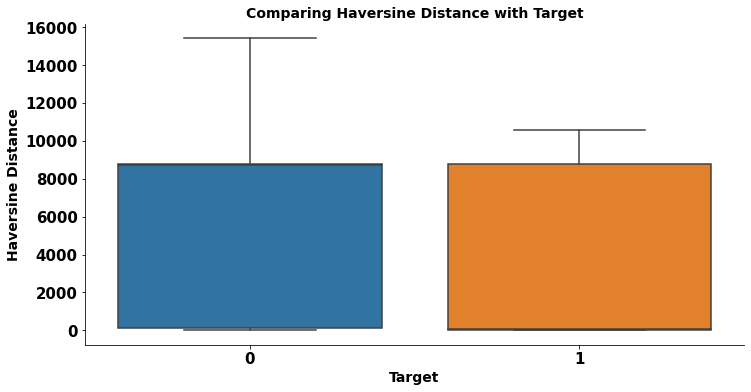

In [ ]:
sns.catplot(x="target", y="haversine_dist", kind="box", data=df, aspect = 2)
plt.xlabel('Target', fontsize = 14, fontweight = 'bold')
plt.ylabel('Haversine Distance', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.title("Comparing Haversine Distance with Target", fontsize = 14, fontweight = 'bold')
plt.show()

1. from this we are able to interpret that vendors with the highest discount percentages were more olikey to get a better vendor rating as is seen with 8% dicount getting a rating of about 4.7/5

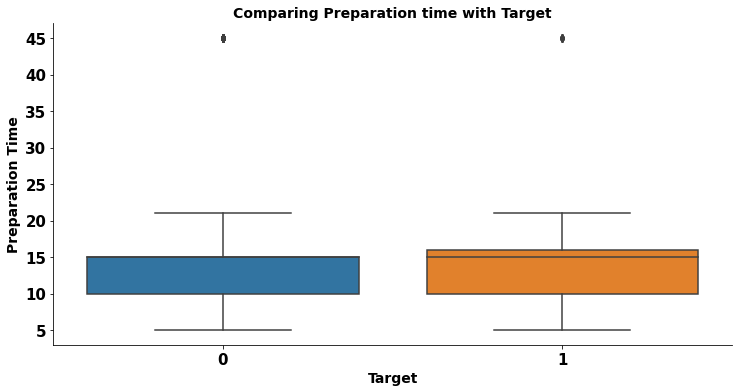

In [ ]:
sns.catplot(x="target", y="preparation_time", kind="box", data=df, aspect = 2)
plt.xlabel('Target', fontsize = 14, fontweight = 'bold')
plt.ylabel('Preparation Time', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 15, fontweight = 'bold')
plt.title("Comparing Preparation time with Target", fontsize = 14, fontweight = 'bold')
plt.show()

<Figure size 576x576 with 0 Axes>

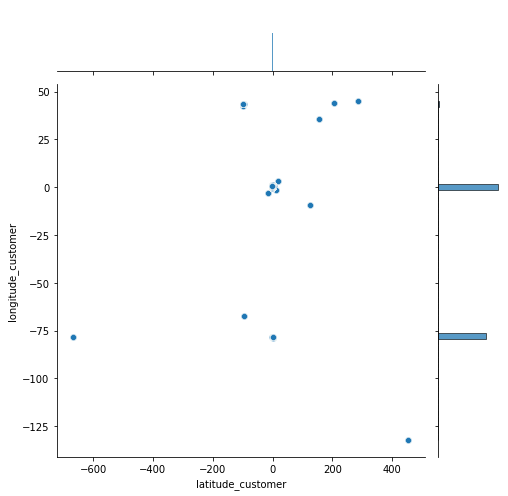

In [ ]:
plt.figure(figsize=(8,8))
sns.jointplot(x="latitude_customer",y="longitude_customer",data=df,size=7)
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.show()



From the plot above we see the longitude latitude ordinates of the customers and we see most customers are clustered at 1 are where latitude 0 meets longitude 0

In [ ]:
# Plot a comparison of the delivery charge based on serving distance  and rank.
#
fig = px.scatter(df, x="serving_distance", y="delivery_charge", )
fig.show()

1. The scatter above shows that the vendors either didn't charge the customers at all for delivery or they charged them 0.7 hence the service distance did not influence the delivery charge in any way

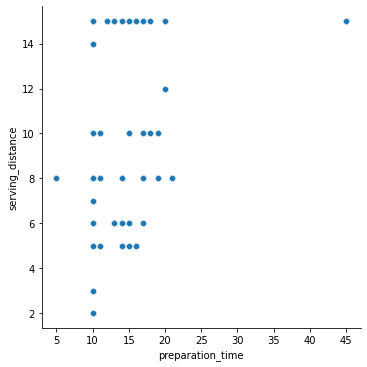

In [ ]:
sns.relplot(x="preparation_time", y="serving_distance", data=df);

1. From this plot we can see that a majority of the meals were prepared between 0 to 20 minutes while there was one meal that took an ubnormaly long preparation time 

In [ ]:
# Plot a comparison of the duration and vendor rating.
#
duration = df[df["vendor_duration_open"] >= 0]
fig = px.scatter(duration, x="vendor_duration_open", y="vendor_rating", )
fig.show()

1. Here we see vendors who had a short preparation duration i.e 0 to 8 minutes averaged a high vendor rating of around 4.2 while their counterparts who took longer 10 to 18 minutes averaged a rating of 3.8

In [ ]:
vendor = df.groupby(["vendor_category_en"])["gender"].value_counts().sort_values(ascending = False)
vendor = pd.DataFrame(vendor)
vendor

,,gender
vendor_category_en,gender,
0,0,486875
1,0,68736
0,1,40800
1,1,5760


From this simple plot we can see that the male gender had the highest numbers in both restaurants and bakes followed by Female then unknown

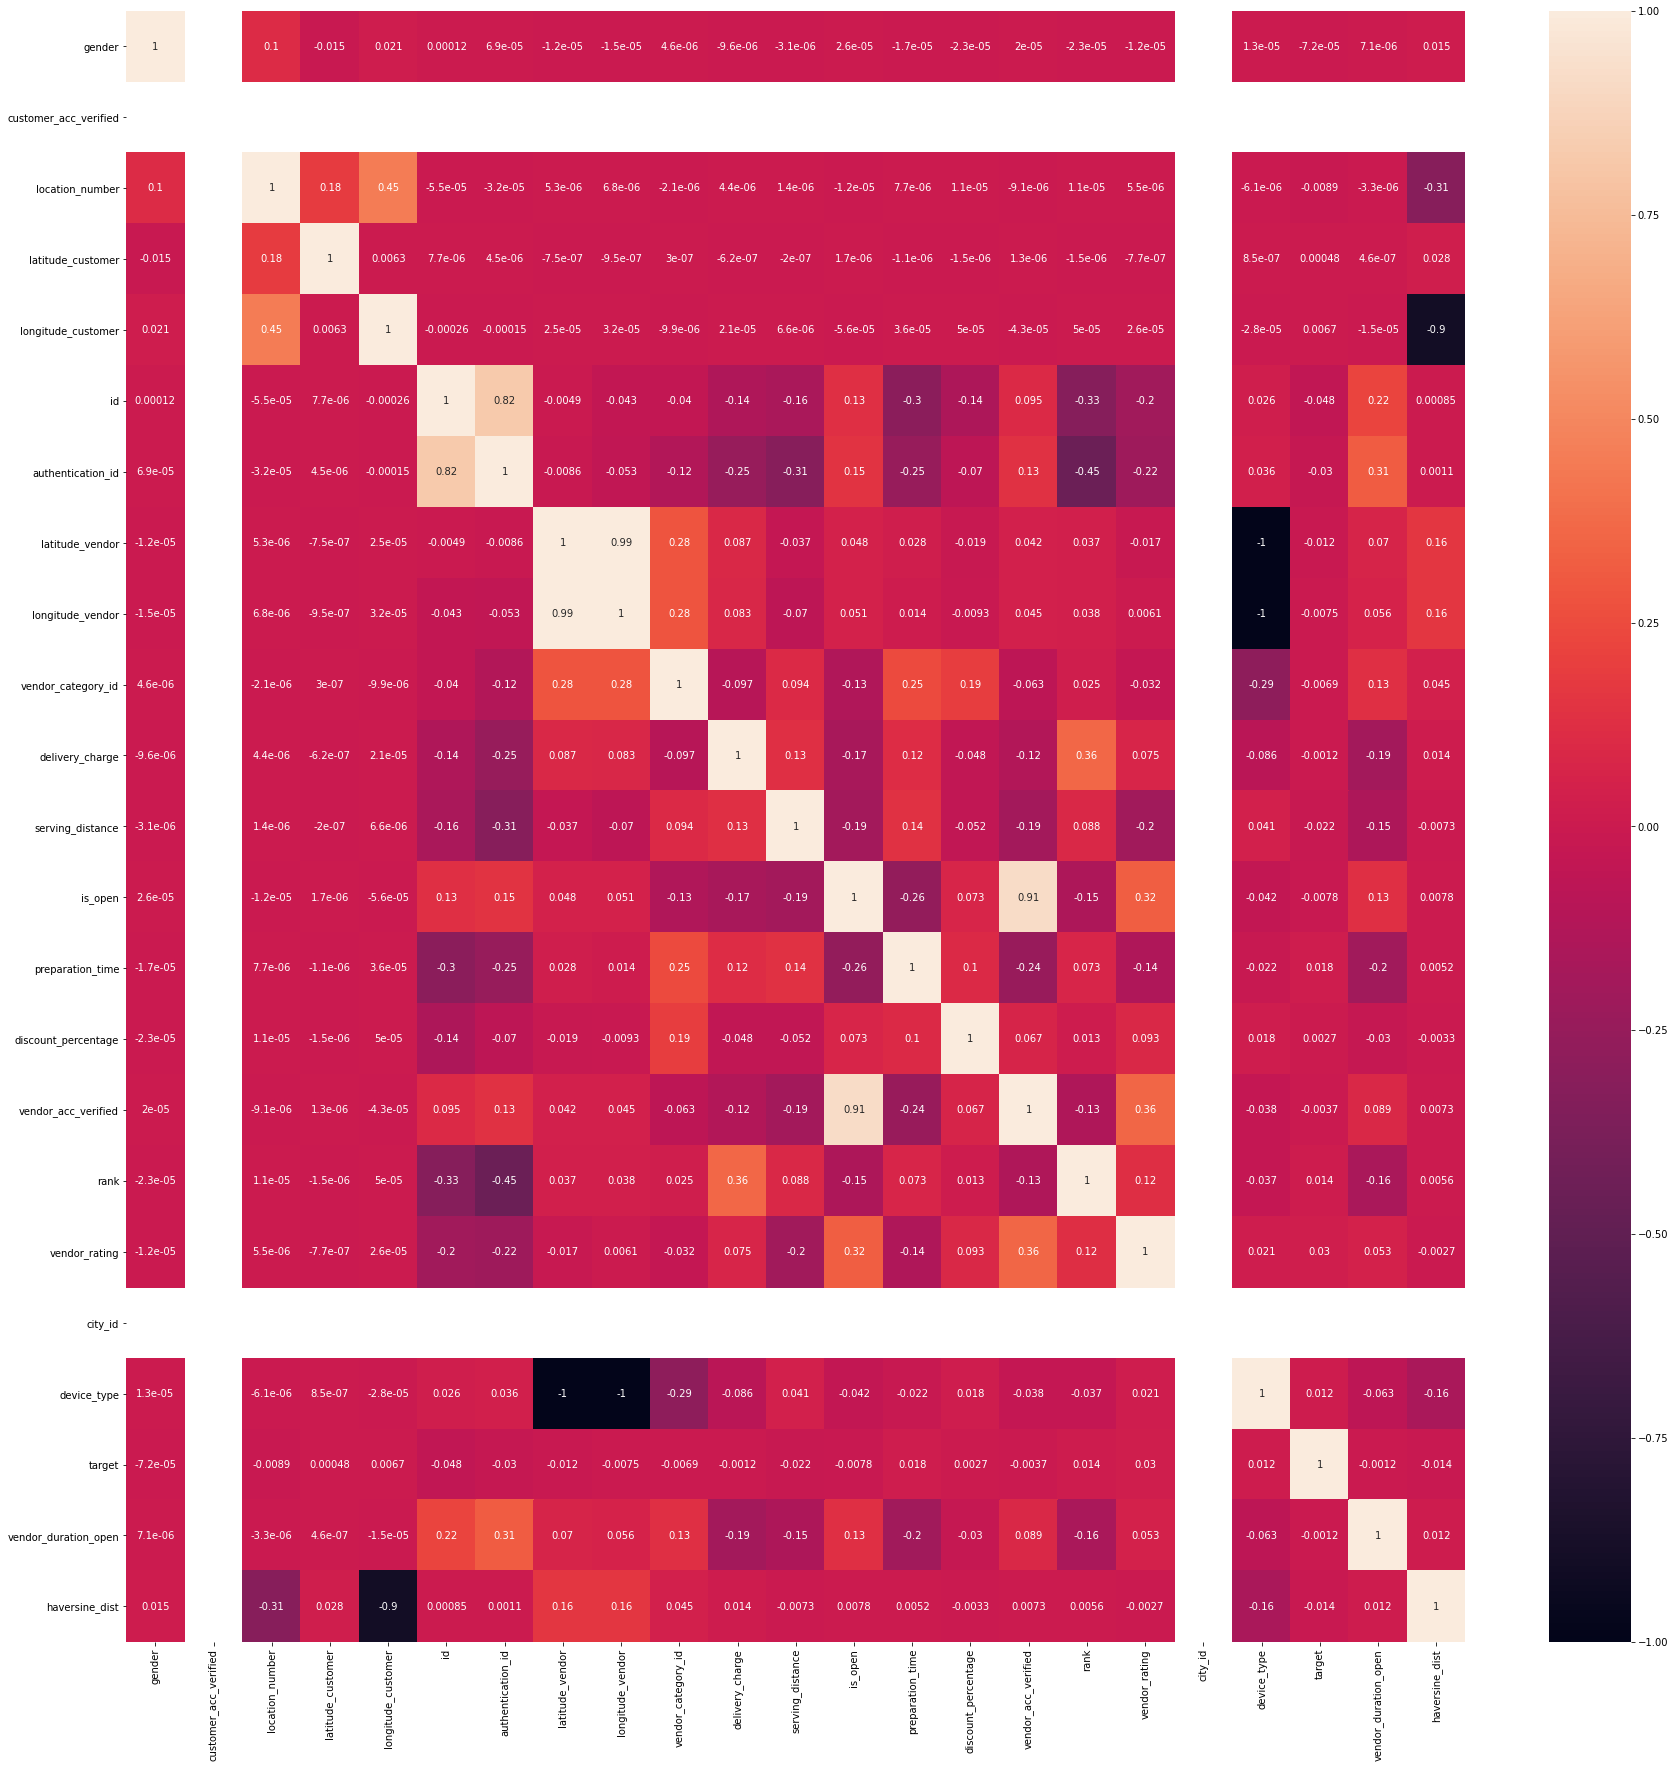

In [ ]:
# Create correlation matrix of numeric variables
pearson_corr = df.corr(method='pearson')

# Plot correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(pearson_corr, vmin=-1, vmax=1, annot=True)

However, pearson correlation assumes normal correlation which most variables don't have

In [ ]:
BBox = ((df.longitude_customer.min(),   df.longitude_customer.max(),      
         df.latitude_customer.min(), df.latitude_customer.max())

SyntaxError: ignored

## EXPLORATORY DATA ANALYSIS CONCLUSION
> From the EDA we were able to find that
> Vendors offering highest discounts got better ratings
>
>Vendors either didnt charge customers at all for delivery or charged them a constant price of 0.7
>
>On average it took 0 to 20 minutes to prepare a meal for it to have a timely delivery
>
>Vendors who had a lower preparation time i.e 0 to 8 mins got a higher average rating
>
>On average the service distance was 11.65, the minimum being 2 and maximum 15.
>
>
